### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
pd.options.display.max_columns=200
import ipywidgets as widgets
pd.set_option('display.max_columns', None)

import wrds

### Load data

In [2]:
df= pd.read_csv("data/compustat_from_1990.csv")
print(df.shape)
df.head()

(211989, 16)


conm  gvkey     cik  tic    datadate   au  fyear       at       lt  \
0  AAR CORP   1004  1750.0  AIR  1991-05-31  6.0   1990  379.958  186.180   
1  AAR CORP   1004  1750.0  AIR  1992-05-31  6.0   1991  395.351  198.614   
2  AAR CORP   1004  1750.0  AIR  1993-05-31  6.0   1992  365.151  175.935   
3  AAR CORP   1004  1750.0  AIR  1994-05-31  6.0   1993  417.626  228.138   
4  AAR CORP   1004  1750.0  AIR  1995-05-31  6.0   1994  425.814  228.695   

      sale      ni      ib   oancf    sich          mv       lev  
0  466.542  14.801  14.801  36.891  5080.0  224.460360  0.490002  
1  422.657  10.020  10.020   8.814  5080.0  204.699595  0.502374  
2  382.780   0.283   0.283  16.806  5080.0  214.663477  0.481814  
3  407.754   9.494   9.484   6.697  5080.0  228.648720  0.546273  
4  451.395  10.463  10.463  15.255  5080.0  243.405235  0.537077

### Define ROA= ni / at

In [3]:
df=df[['gvkey', 'fyear', 'ni', 'at']]
df['lag_at']= df.groupby('gvkey')['at'].shift(1)
df['ROA']= df['ni'] / df['lag_at']
df= df[df['ROA'].notnull()]
df.count()

gvkey     189443
fyear     189443
ni        189443
at        189406
lag_at    189443
ROA       189443
dtype: int64

### Trim outliers

In [4]:
df=df[abs(df.ROA)<0.30]
df.shape

(148543, 6)

### Histogram: 1990 ~ 2020

In [5]:
import matplotlib.patches as patches

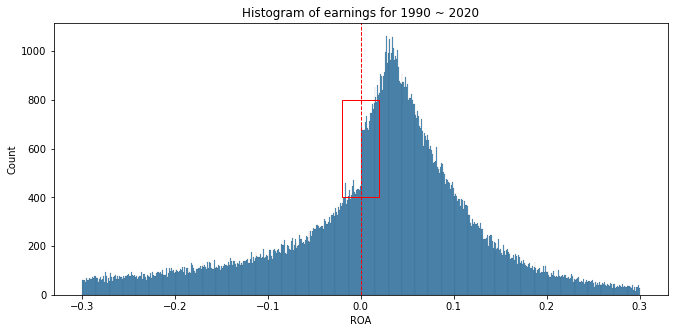

In [6]:
plt.figure(figsize=(11,5))
plt.title('Histogram of earnings for 1990 ~ 2020')
ax= sns.histplot(data=df, x= 'ROA', binwidth= 0.001)
ax.axvline(0, 0, 400, color='red', linewidth =1, linestyle= '--')
rect = patches.Rectangle((-0.02, 400), 0.04, 400, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

### Histogram: Sup-periods

3


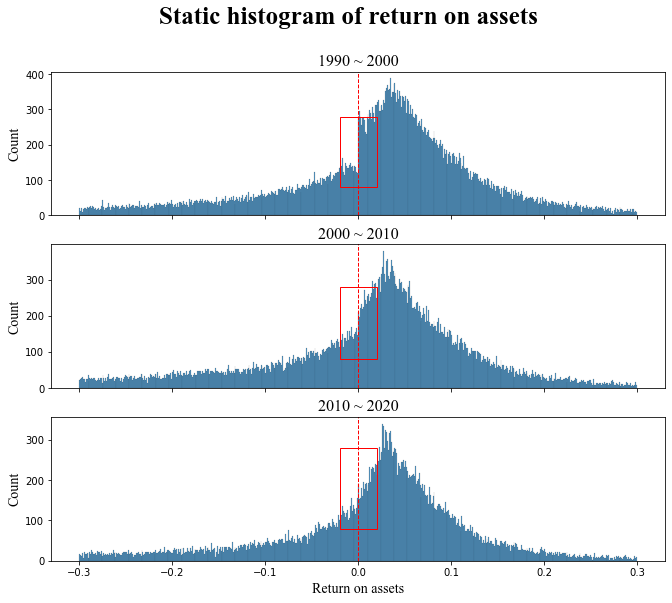

In [7]:
start_year= 1990
end_year= 2020
by= 10
var= 'ROA'
n= int((end_year - start_year)/by)
print(n)
fig, axes = plt.subplots(n, 1, figsize=(11, 3*n), sharex=True)
fig.suptitle('Static histogram of return on assets', fontsize=25,fontname='Times New Roman', weight='bold')
for i in range(n):
    y1= start_year + i*by
    y2= start_year + (i+1)*by
    hist= sns.histplot(ax=axes[i], data=df[(df.fyear>= y1 ) & (df.fyear< y2)], x= var, binwidth= 0.001)
    hist.axvline(0, 0, 400, color='red', linewidth =1, linestyle= '--')    
    axes[i].set_title(f"{y1} ~ {y2}",fontname='Times New Roman', fontsize=16)
    axes[i].set_xlabel(xlabel= 'Return on assets', fontname='Times New Roman', fontsize= 14)
    axes[i].set_ylabel(ylabel= 'Count', fontname='Times New Roman', fontsize= 14)
    
    rect = patches.Rectangle((-0.02, 80), 0.04, 200, linewidth=1, edgecolor='r', facecolor='none')
    axes[i].add_patch(rect)

In [8]:
fig.savefig('../assets/images/earnings-kink-static.jpg')

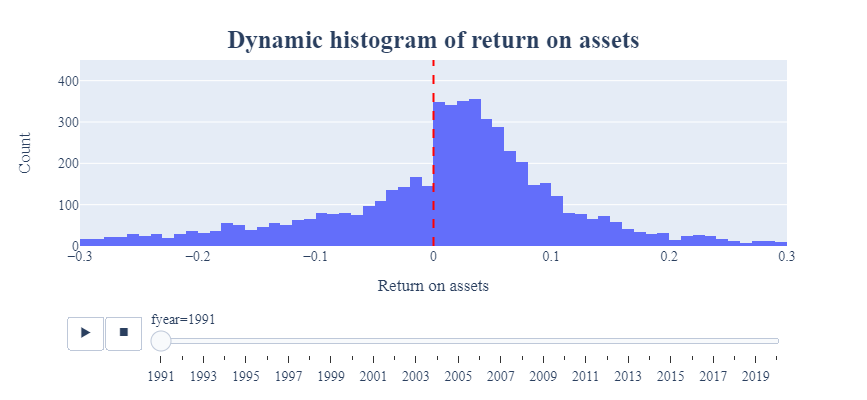

In [11]:
fig=px.histogram(df, 'ROA', height=400, width=800, nbins=60, animation_frame='fyear')

fig.update_xaxes(fixedrange=True)
fig.update_yaxes(fixedrange=True)
fig.update_layout(yaxis_range=[0,450])


# global set-up
fig.update_layout(
    font_family="Times New Roman",
    font_size=15)

# title set-up
fig.update_layout(
    title={
        'text': "<b>Dynamic histogram of return on assets</b>",
        'font_size':25,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(yanchor='top',
               y=0.99,
               xanchor='right',
               x=0.99,
               font_size=13,
               ))

fig.update_layout(
    xaxis_title="Return on assets",
    yaxis_title="Count",
    font=dict(
        family="Times New Roman",
        size=14
    )
)

fig.add_vline(x=0, line_color = 'red', line_dash='dash')
fig.show()

In [12]:
fig.write_html('..\_includes\earnings-kink-dynamic.html', auto_play= False)